<a href="https://colab.research.google.com/github/chitesh-marmat/Datasets-Explorations/blob/main/Air%20Quality/air_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Quality Data Exploration

This notebook explores air quality data by handling missing values, detecting outliers,
and analyzing feature correlations.

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [3]:
!ls

sample_data


In [4]:
url = "https://raw.githubusercontent.com/chitesh-marmat/Datasets-Explorations/main/Air%20Quality/AirQuality.csv"

# Load the dataset
df = pd.read_csv(url)

## Data Cleaning & Preprocessing


In [6]:
df

Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2            6;1360;150;11                 9;1046;166;1056;113;1692;1268;13 6;48 9;0                                                7578;;                                                                          
10/03/2004;19.00.00;2;1292;112;9 4;955;103;1174;92;1559;972;13 3;47                             7;0  7255;;                                                NaN                                                                          
10/03/2004;20.00.00;2            2;1402;88;9                   0;939;131;1140;114;1555;1074;11  9;54 0;0                                                7502;;                                                                          
10/03/2004;21.00.00;2            2;1376;80;9                   2;948;172;1092;122;1584;1203;11  0;60 0;0                                                7867;;                                                                          
10/03/2004;22.00.00;1            6;1272;51;6                   5;836;131;1205;116;1490;1110;11  2;59 6;0                                                7888;;                                                                          
...                                                                                                                                                        ...                                                                          
;;;;;;;;;;;;;;;;                 NaN                           NaN                              NaN  NaN                                                   NaN                                                                          
                                                                                                     NaN                                                   NaN                                                                          
                                                                                                     NaN                                                   NaN                                                                          
                                                                                                     NaN                                                   NaN                                                                          
                                                                                                     NaN                                                   NaN                                                                          

[9471 rows x 1 columns]

#### since the dataset has been delimited by ';', we need to change the delimiter to ';' instead ',' and decimals are represented by commas therefore changed accordingly



In [8]:
df = pd.read_csv(url,sep=";", decimal=",",header=0)
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 9471 rows and 17 columns.


In [10]:
df.columns # Name of columns in dataset

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

### **Pollutants and Environmental Factors in the Dataset**  
- **CO(GT)** → Carbon Monoxide (CO)  
- **PT08.S1(CO)** → Sensor 1 for CO  
- **NMHC(GT)** → Non-Methane Hydrocarbons (NMHC)  
- **C6H6(GT)** → Benzene (C₆H₆)  
- **PT08.S2(NMHC)** → Sensor 2 for NMHC  
- **NOx(GT)** → Nitrogen Oxides (NOₓ)  
- **PT08.S3(NOx)** → Sensor 3 for NOₓ  
- **NO2(GT)** → Nitrogen Dioxide (NO₂)  
- **PT08.S4(NO2)** → Sensor 4 for NO₂  
- **PT08.S5(O3)** → Sensor 5 for Ozone (O₃)  
- **T** → Temperature (°C)  
- **RH** → Relative Humidity (%)  
- **AH** → Absolute Humidity  


In [11]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


### Handling Null Values

In [13]:
df.isnull().sum()


,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


In [14]:
df.tail(9356)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
115,15/03/2004,13.00.00,2.9,1417.0,207.0,14.9,1146.0,171.0,830.0,119.0,1831.0,1404.0,23.3,32.2,0.9096,NaN,NaN
116,15/03/2004,14.00.00,2.9,1400.0,191.0,15.4,1162.0,159.0,838.0,111.0,1829.0,1263.0,23.9,30.0,0.8757,NaN,NaN
117,15/03/2004,15.00.00,2.5,1317.0,185.0,12.1,1053.0,153.0,926.0,104.0,1707.0,1137.0,24.4,28.9,0.8736,NaN,NaN
118,15/03/2004,16.00.00,2.3,1318.0,141.0,11.5,1033.0,143.0,950.0,99.0,1675.0,1068.0,24.4,29.4,0.8848,NaN,NaN
119,15/03/2004,17.00.00,2.8,1445.0,214.0,14.8,1141.0,156.0,857.0,110.0,1824.0,1252.0,23.8,31.3,0.9137,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Also figured that last 114 rows are empty(9357-9470)
df.iloc[9355:9360]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,NaN,NaN
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028,NaN,NaN
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Since column 15 and 16 are empty we will drop them and last 114 rows are empty
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])
df.dropna(inplace=True)

In [17]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


###  Given that dataset says that the null values are labelled with -200 value in the dataset

In [18]:

(df == -200).sum()  # Returns the total count of -200 in the DataFrame


,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


In [19]:
#first labelling -200 value as null value
df.replace(to_replace=-200,value=np.nan,inplace=True)

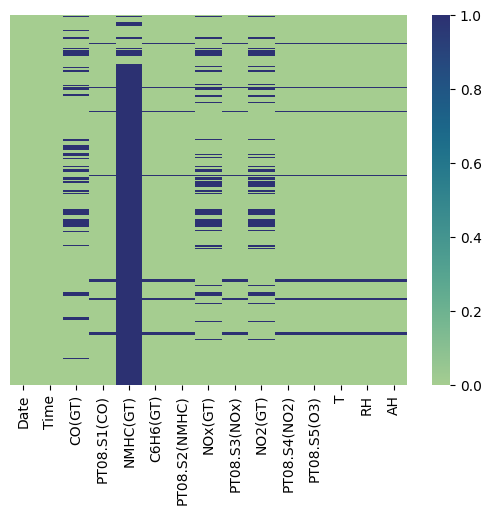

In [20]:
sns.heatmap(df.isna(),yticklabels=False,cmap='crest') # analysing using heatmap
plt.show()


In [21]:
# Since column:NHMC(GT) is almost empty we will drop it

In [22]:
df = df.drop(columns=['NMHC(GT)'])

In [23]:
df.isnull().sum()

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642
PT08.S4(NO2),366


### Handling Missing Values with Backward Fill (`bfill`)

We use **backward fill (`bfill`)** to handle missing values, replacing them with the next valid observation. This approach ensures that gaps in data are filled using more recent measurements, making it suitable for time-series data like air quality, where pollutant levels change gradually.


In [24]:
df.fillna(method='bfill', inplace=True)


In [25]:
df.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0


In [26]:
df # cleaned dataset without null values

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


## Exploratory Data Analysis (EDA) using different plots



### **Time-Series Analysis of Sensor Data**
This time-series plot shows how pollution levels change over time based on sensor readings. It helps us spot patterns, trends, and unexpected spikes in air quality.

#### **Breaking It Down**
- **X-Axis (Datetime):** The timeline of recorded pollution levels.  
- **Y-Axis (Sensor Reading):** How much of a specific pollutant was detected.  
- **Trends & Patterns:** Do pollution levels rise or fall over time? Are there seasonal changes?  
- **Spikes & Dips:** Sudden jumps may indicate pollution surges, while drops could suggest cleaner air.  

#### **Why It Matters**
By analyzing this data, we can understand pollution trends, predict future air quality, and even take action to improve environmental conditions. A smoother trend line (like a moving average) can help remove noise and show long-term changes more clearly.  


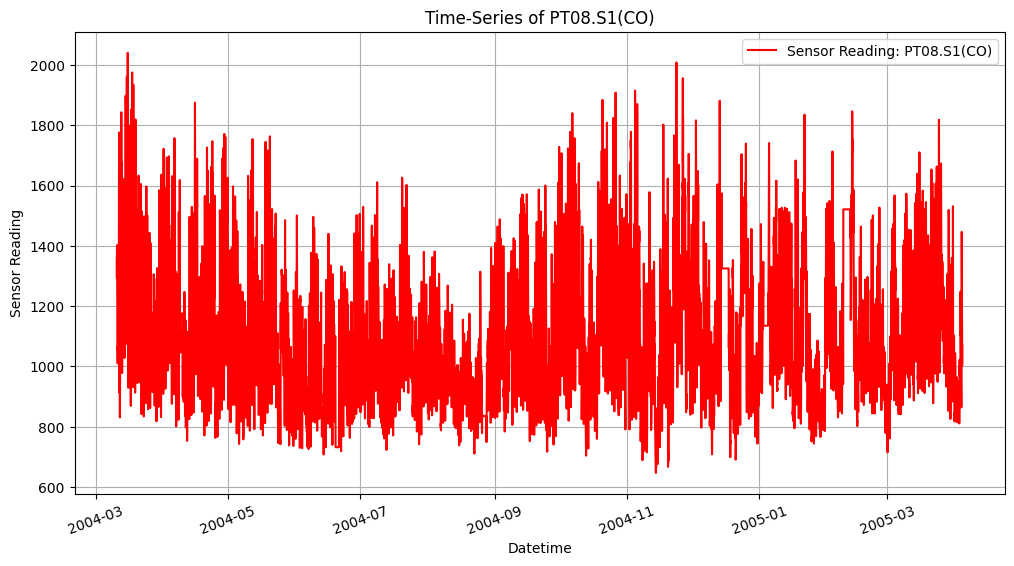

In [29]:
# Convert 'Date' and 'Time' into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format="%d/%m/%Y %H.%M.%S")

# Choosing a sensor reading column to plot
sensor_column = 'PT08.S1(CO)'

# Plot the time-series data using the newly created 'Datetime' column
plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'], df[sensor_column], label=f'Sensor Reading: {sensor_column}', color='r')

# Formatting the plot
plt.xlabel('Datetime')
plt.ylabel('Sensor Reading')
plt.title(f'Time-Series of {sensor_column}')
plt.legend()
plt.xticks(rotation=20)  # Rotate x-axis labels for better readability
plt.grid()

plt.show()



### Understanding Heatmap Plots for Sensor Readings

Heatmap plots provide an effective way to visualize hourly trends in sensor readings over a given day. Each heatmap represents the variation of a specific sensor's readings throughout the 24-hour period.

#### **How to Interpret the Heatmap**
- The **x-axis** represents the **hour of the day (0-23)**.
- The **color gradient** indicates the magnitude of sensor readings:
  - **Cooler colors (blue shades)** represent lower sensor values.
  - **Warmer colors (red shades)** indicate higher sensor values.
- Each row in the heatmap corresponds to an hourly observation.

#### **Why Use a Heatmap?**
- It helps identify **daily pollution patterns** and peak pollution hours.
- Enables **comparison across different sensors** to observe correlations.
- Useful for detecting **anomalies or unusual spikes** in air quality data.

By analyzing these heatmaps, we can gain insights into **hourly pollution trends**, detect possible sources of pollution, and assess air quality variations throughout the day.


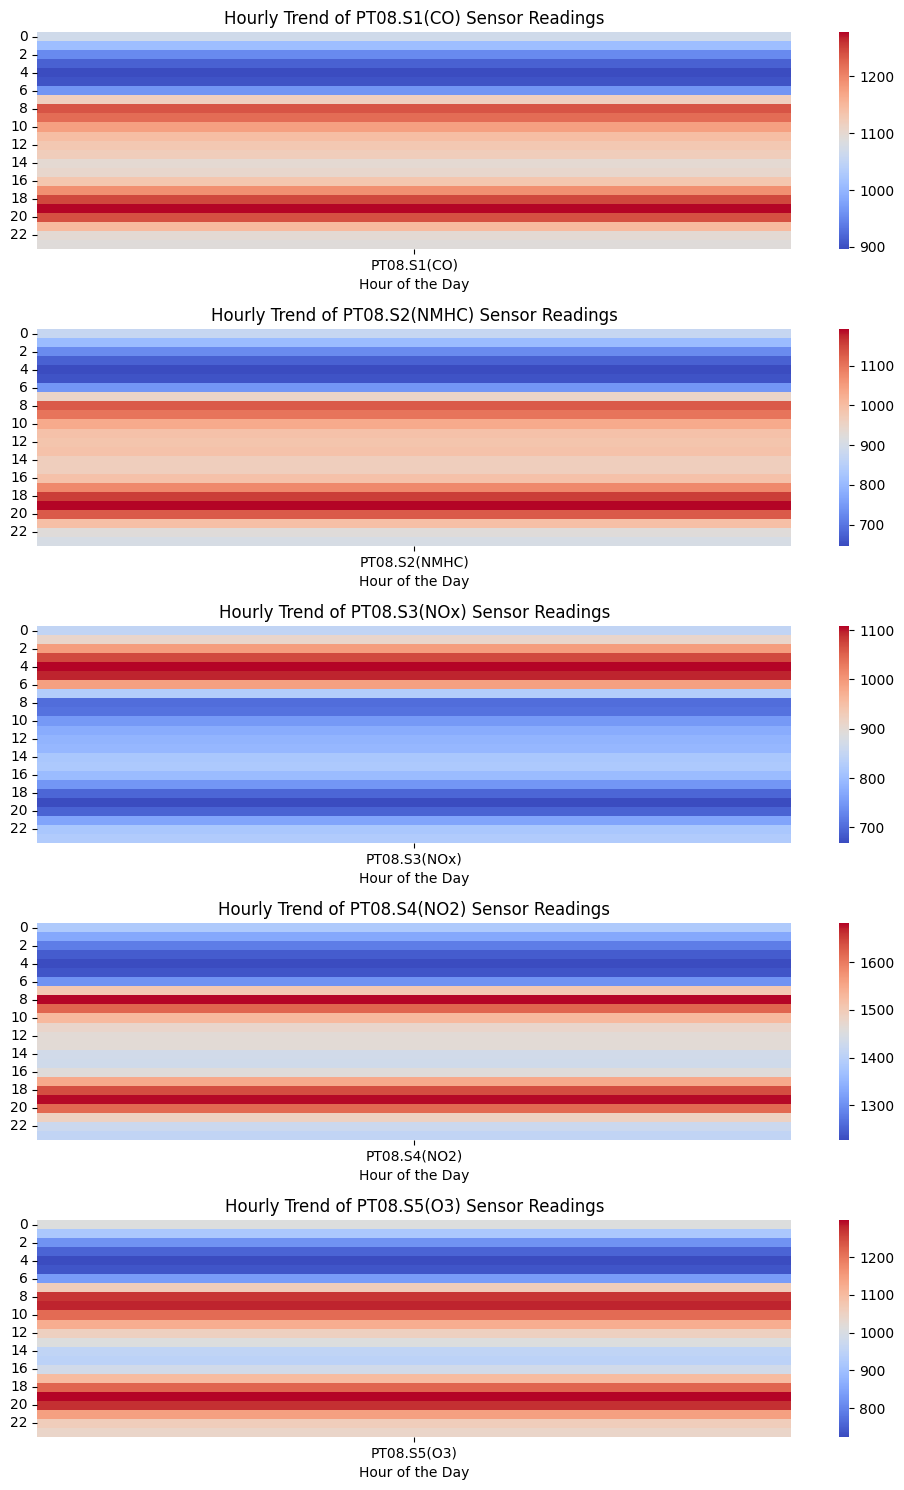

In [30]:

# Extract hour from Datetime
df['Hour'] = df['Datetime'].dt.hour

sensor_columns = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

# Create a figure for multiple heatmaps
fig, axes = plt.subplots(nrows=len(sensor_columns), figsize=(10, 15))

for i, sensor in enumerate(sensor_columns):
    # Hourly trend of the sensor readings
    hourly_pivot = df.pivot_table(values=sensor, index=df['Hour'], aggfunc='mean')

    # Plotting heatmap
    sns.heatmap(hourly_pivot, cmap="coolwarm", ax=axes[i])
    axes[i].set_title(f"Hourly Trend of {sensor} Sensor Readings")
    axes[i].set_xlabel("Hour of the Day")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()


### **Moving Averages for Smoother Trends in Sensor Data**

#### **Overview**
Moving averages help smooth out short-term fluctuations and highlight long-term trends in sensor data. This technique is particularly useful for detecting seasonal variations and underlying patterns in air pollution or environmental monitoring datasets.

#### **Key Insights from Moving Average Plots**
- **Original Data (Light Blue Line):** Represents actual hourly sensor readings with noticeable fluctuations.
- **Moving Average (Red Line):** A smoothed trend over a specified window (e.g., 24-hour average for daily trends).
- **Long-Term Patterns:** The moving average reduces noise and makes it easier to identify trends, such as periods of increasing or decreasing pollution levels.

#### **How to Interpret the Plot**
- Peaks and troughs indicate changes in pollution levels over time.
- The moving average line provides a clearer representation of long-term trends compared to raw sensor readings.
- Helps in understanding how pollution varies across different months or seasons.


This visualization is particularly beneficial in environmental analysis, anomaly detection, and forecasting applications.

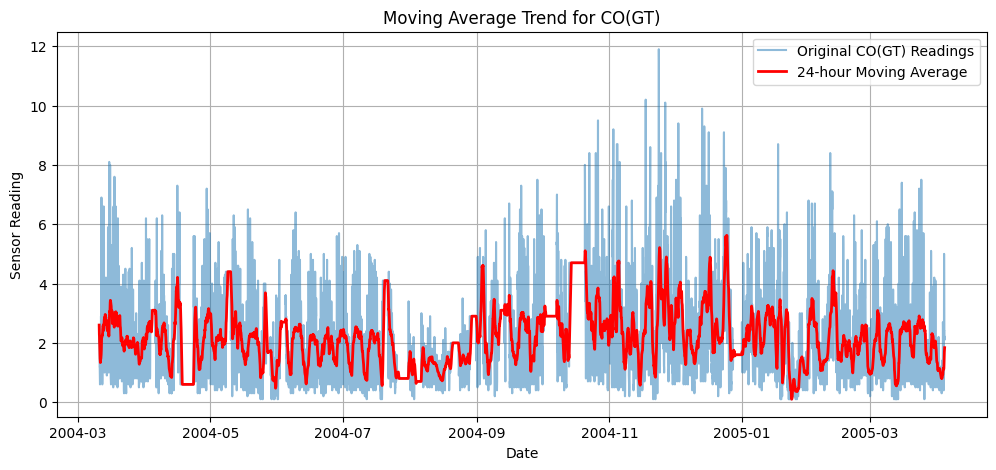

In [31]:
sensor_column = 'CO(GT)'

# Define moving average window (e.g., 24 hours)
window_size = 24

# Computing moving average
df['Moving_Avg'] = df[sensor_column].rolling(window=window_size, min_periods=1).mean()

# Plot original vs. smoothed data
plt.figure(figsize=(12, 5))
plt.plot(df['Datetime'], df[sensor_column], alpha=0.5, label=f'Original {sensor_column} Readings')
plt.plot(df['Datetime'], df['Moving_Avg'], color='red', linewidth=2, label=f'{window_size}-hour Moving Average')

# Formatting the plot
plt.xlabel("Date")
plt.ylabel("Sensor Reading")
plt.title(f"Moving Average Trend for {sensor_column}")
plt.legend()
plt.grid(True)
plt.show()


## Outlier Detection & Handling


### Visualizing Outliers Using a Box Plot

- This helps us identify which columns have extreme values.
- Outliers appear as individual points outside the whiskers of the box.


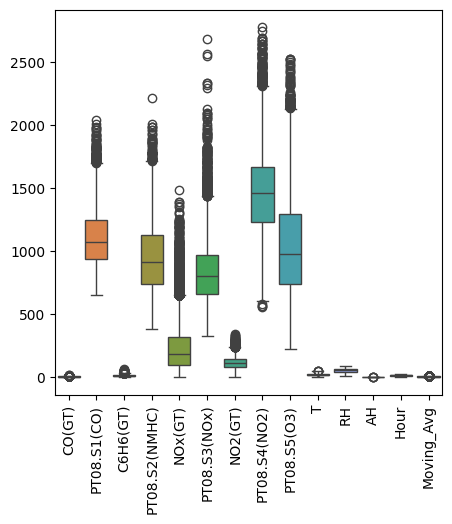

In [32]:
# plotting a boxplot
plt.figure(figsize=(5,5))
sns.boxplot(data=df)
plt.xticks(rotation='vertical')
plt.show()

In [33]:
for column in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # if the values fall behind Q1 - (1.5 * IQR) or above Q3 + 1.5*IQR,then it is been defined as outlier

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"{column}: {len(outliers)} outliers found")


CO(GT): 166 outliers found
PT08.S1(CO): 98 outliers found
C6H6(GT): 225 outliers found
PT08.S2(NMHC): 63 outliers found
NOx(GT): 658 outliers found
PT08.S3(NOx): 245 outliers found
NO2(GT): 122 outliers found
PT08.S4(NO2): 120 outliers found
PT08.S5(O3): 148 outliers found
T: 4 outliers found
RH: 0 outliers found
AH: 4 outliers found
Hour: 0 outliers found
Moving_Avg: 282 outliers found


### Applying Quantile-Based Flooring & Capping
- We cap outliers at the **5th percentile (lower bound)** and **95th percentile (upper bound)**.
- This keeps the data intact while reducing extreme effects.

In [34]:
def cap_outliers(df):
    for column in df.select_dtypes(include=['number']).columns:
        lower_bound = df[column].quantile(0.05)  # 5th percentile
        upper_bound = df[column].quantile(0.95)  # 95th percentile

        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

df = cap_outliers(df)


### Rechecking box-plots after Outlier-handling

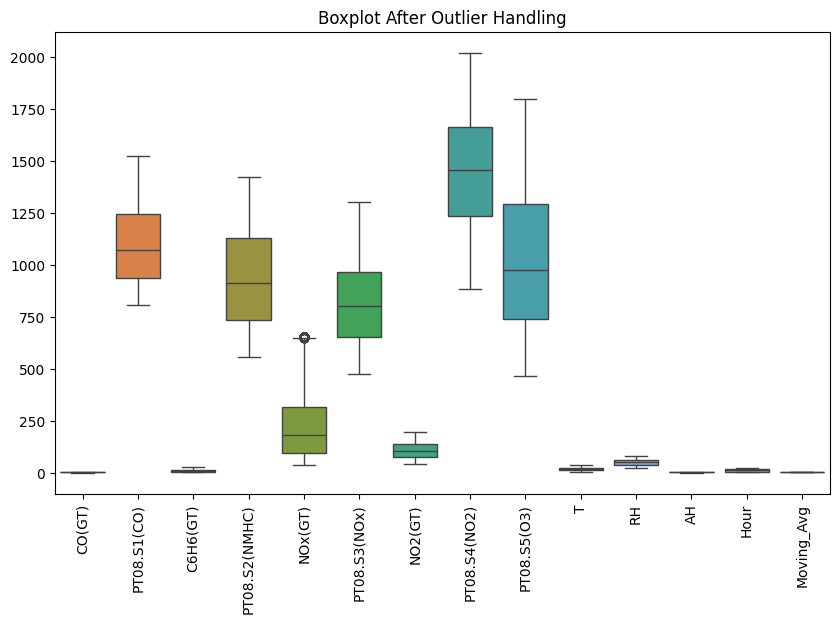

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)  # Change to df_replaced if using median replacement
plt.xticks(rotation=90)
plt.title("Boxplot After Outlier Handling")
plt.show()


In [36]:
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime,Hour,Moving_Avg
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357,9357.000000,9357.000000
mean,2.125019,1100.603185,9.893492,937.209319,234.262648,824.429048,108.880731,1448.204296,1027.160030,18.069082,49.567607,1.018250,2004-09-21 16:00:00,11.498557,2.157803
min,0.500000,807.000000,1.700000,558.000000,35.000000,476.000000,41.000000,885.000000,462.800000,4.600000,20.400000,0.402180,2004-03-10 18:00:00,1.000000,0.800000
25%,1.000000,937.000000,4.400000,734.000000,95.000000,653.000000,74.000000,1232.000000,737.000000,11.600000,36.300000,0.737400,2004-06-16 05:00:00,5.000000,1.512500
50%,1.900000,1069.000000,8.300000,912.000000,180.000000,803.000000,106.000000,1457.000000,973.000000,17.600000,50.200000,0.993300,2004-09-21 16:00:00,11.000000,2.129167
75%,3.000000,1242.000000,14.300000,1126.000000,316.000000,965.000000,138.000000,1662.000000,1292.000000,24.100000,62.900000,1.306700,2004-12-28 03:00:00,18.000000,2.700000
max,4.700000,1521.000000,24.800000,1423.200000,654.200000,1303.200000,194.000000,2020.200000,1796.000000,34.300000,77.600000,1.720440,2005-04-04 14:00:00,22.000000,3.955000
std,1.283106,204.310773,6.610353,247.751329,180.315561,225.357354,43.107719,311.156063,376.979209,8.324950,16.612549,0.379986,NaN,6.789428,0.834140


In [37]:
for column in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # if the values fall behind Q1 - (1.5 * IQR) or above Q3 + 1.5*IQR,then it is been defined as outlier

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"{column}: {len(outliers)} outliers found")

CO(GT): 0 outliers found
PT08.S1(CO): 0 outliers found
C6H6(GT): 0 outliers found
PT08.S2(NMHC): 0 outliers found
NOx(GT): 658 outliers found
PT08.S3(NOx): 0 outliers found
NO2(GT): 0 outliers found
PT08.S4(NO2): 0 outliers found
PT08.S5(O3): 0 outliers found
T: 0 outliers found
RH: 0 outliers found
AH: 0 outliers found
Hour: 0 outliers found
Moving_Avg: 0 outliers found


## Correlation Analysis

In [38]:
df_numeric = df.select_dtypes(include=['number'])

In [39]:
corr_matrix= df_numeric.corr()
corr_matrix

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Moving_Avg
CO(GT),1.000000,0.735707,0.780616,0.775587,0.770559,-0.653483,0.677216,0.528220,0.725842,0.052608,0.045100,0.087970,0.323703,0.575455
PT08.S1(CO),0.735707,1.000000,0.884839,0.889254,0.632558,-0.816279,0.603823,0.637312,0.906079,0.023091,0.109409,0.100395,0.316833,0.434016
C6H6(GT),0.780616,0.884839,1.000000,0.989431,0.620597,-0.788660,0.581532,0.737286,0.874099,0.205365,-0.084143,0.154432,0.350109,0.374029
PT08.S2(NMHC),0.775587,0.889254,0.989431,1.000000,0.616415,-0.825745,0.599353,0.744166,0.879094,0.232737,-0.104626,0.165647,0.383017,0.375340
NOx(GT),0.770559,0.632558,0.620597,0.616415,1.000000,-0.652624,0.786386,0.176269,0.690902,-0.238588,0.211640,-0.105892,0.227337,0.494387
PT08.S3(NOx),-0.653483,-0.816279,-0.788660,-0.825745,-0.652624,1.000000,-0.623426,-0.523400,-0.836340,-0.105623,-0.075201,-0.203464,-0.319650,-0.367862
NO2(GT),0.677216,0.603823,0.581532,0.599353,0.786386,-0.623426,1.000000,0.127610,0.649076,-0.179180,-0.082746,-0.301012,0.364550,0.302765
PT08.S4(NO2),0.528220,0.637312,0.737286,0.744166,0.176269,-0.523400,0.127610,1.000000,0.550778,0.588923,-0.050291,0.644423,0.226403,0.253495
PT08.S5(O3),0.725842,0.906079,0.874099,0.879094,0.690902,-0.836340,0.649076,0.550778,1.000000,-0.048443,0.125358,0.044438,0.232995,0.464073
T,0.052608,0.023091,0.205365,0.232737,-0.238588,-0.105623,-0.179180,0.588923,-0.048443,1.000000,-0.573106,0.674367,0.197565,-0.064845


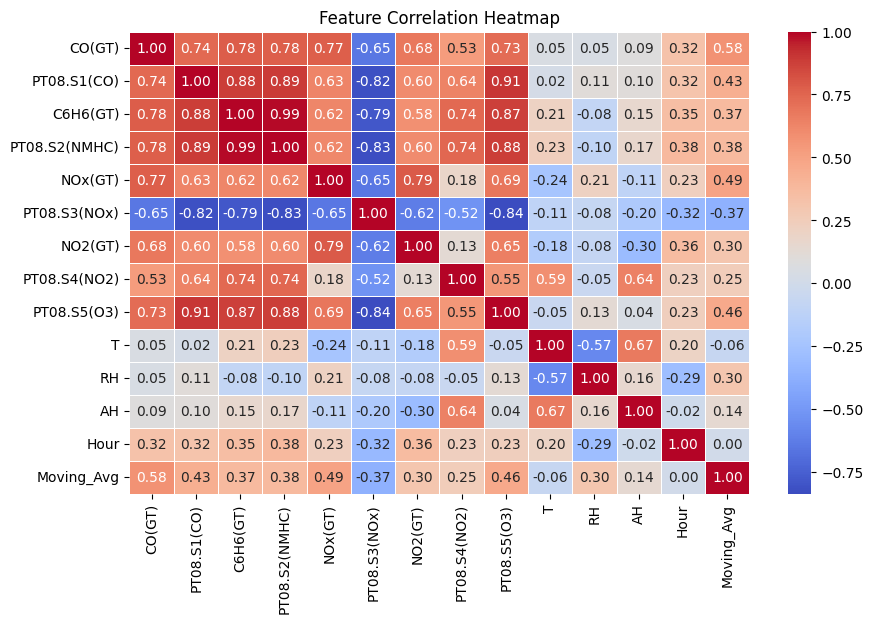

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [41]:
df.to_csv('cleaned_air_quality.csv', index=False)
